# Flat field corrected energy-bin image

CNR = 0.114


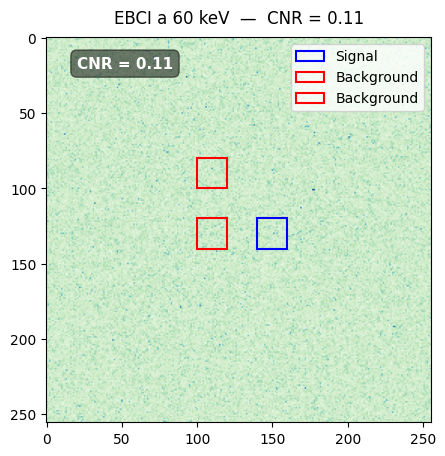

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

I = np.loadtxt(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\PMMA weight\Intensidad txt\PMMAPLACA60keV.txt")#imagen normal RAW
I_0 = np.loadtxt(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\PMMA weight\FF txt\FFPMMAPLACA60keV.txt") #flat field PMMA sólido

EBCI = I/I_0

#plt.figure(figsize=(12,4))
#plt.subplot(1,3,1)
#plt.imshow(I, cmap='gray')
#plt.title("Imagen RAW (I)-20keV")
#plt.axis('on')

#plt.subplot(1,3,2)
#plt.imshow(I_0, cmap='gray')
#plt.title("Flat Field (I₀ - PMMA sólido)-20keV")
#plt.axis('on')

#plt.subplot(1,3,3)
#plt.imshow(EBCI, cmap='GnBu')
#plt.title("f(20 keV)")
#plt.axis('on')
#plt.xlabel('x')
#plt.ylabel('Intensidad')
#plt.colorbar()

#plt.savefig(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones PMMA\visualizacion corrección\Corr_60keV.png", dpi=300)
#plt.tight_layout()
#plt.show()

#-------------Calculamos el CNR------------------------------------------
#ROI dentro de la placa
y1,y2 = 120, 140
x1,x2 = 140, 160
ROI_signal = EBCI[y1:y2, x1:x2]
#ROI fondo sangre 
y3,y4 = 120, 140
x3,x4 = 100, 120
y5,y6 = 80, 100
x5,x6 = 100, 120
ROI_background1 = EBCI[y3:y4, x3:x4]
ROI_background2 = EBCI[y5:y6, x5:x6]
ROI_background = np.concatenate((ROI_background1, ROI_background2))
#Calculo de valores 
N_S = np.mean(ROI_signal)
N_B = np.mean(ROI_background)
sigma_B = np.std(ROI_background)
CNR = abs(N_S - N_B) / sigma_B

print(f"CNR = {CNR:.3f}")

# ---- Gráfico -------------------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(EBCI, cmap='GnBu')

# Dibujar los rectángulos
rect_s = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                           linewidth=1.5, edgecolor='blue', facecolor='none', label='Signal')
rect_b1 = patches.Rectangle((x3, y3), x4-x3, y4-y3,
                           linewidth=1.5, edgecolor='red', facecolor='none', label='Background')
rect_b2 = patches.Rectangle((x5, y5), x6-x5, y6-y5,
                           linewidth=1.5, edgecolor='red', facecolor='none', label='Background')
ax.add_patch(rect_s)
ax.add_patch(rect_b1)
ax.add_patch(rect_b2)

# Leyenda
ax.legend(loc='upper right', fontsize=10)

# Título con energía y CNR
energia = 60  # ejemplo------------------------------------------
ax.set_title(f"EBCI a {energia} keV  —  CNR = {CNR:.2f}", fontsize=12, pad=10)

# Mostrar también el valor sobre la imagen (opcional)
ax.text(20, 20, f"CNR = {CNR:.2f}",
        color='white', fontsize=11, weight='bold',
        bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.4'))

#plt.savefig(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\PMMA weight\Imagenes EBCI\CNR60keV", dpi=300)
plt.show()




# Grfica de CNR contra energía 

In [ ]:

E = np.array([20, 25, 30, 35, 40, 45, 50, 55, 60])  # Energías (keV)

# CNRs simulados o medidos para distintas condiciones
CNR_Calculado = np.array([2.67, 1.85, 1.23, 0.68, 0.53, 0.39, 0.28, 0.19, 0.11])

# Energías de máximo CNR (E_max) y R² por cada caso
Emax = [20, 25, 30, 35, 40]


# ====== Gráfico ======
plt.figure(figsize=(7, 5))

# Dibujar curvas (puedes usar tus propios datos)
plt.plot(E, CNR_Calculado, 'bo--', linewidth=2.2)




# Estilo general
plt.title(r"CNR spectrum: $W^{Al}_{62}$", fontsize=14, weight='bold')
plt.xlabel("Energy (keV)", fontsize=12)
plt.ylabel("CNR", fontsize=12)
plt.xlim(10, 65)

plt.grid(True, alpha=0.4)
plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

#cargamos las imagenes RAW

I = np.loadtxt(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\PMMA weight\Intensidad txt\PMMAPLACA20keV.txt")#imagen normal RAW
I_0 = np.loadtxt(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\PMMA weight\FF txt\FFPMMAPLACA20keV.txt") #flat field PMMA sólido
h = 1.054571817e-34
c = 2.99792458e8 #m/s
k = (h*c)/(2*(20*1.602176634e-19*1e3))
# --- CORRECCIÓN BELTRÁN ---
# Evita divisiones por cero
#_0[I_0 == 0] = np.min(I_0[I_0 > 0])

# Corrección
I_cor = np.log(I_0 / I)
I_corr =k*I_cor

# --- NORMALIZACIÓN (opcional para visualizar) ---
#I_corr_norm = I_corr / np.max(I_corr)
#I_corr_norm = I_corr
# --- VISUALIZACIÓN ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')
plt.title("Imagen RAW (I)")
plt.axis('on')

plt.subplot(1,3,2)
plt.imshow(I_0, cmap='gray')
plt.title("Flat Field (I₀ - PMMA sólido)")
plt.axis('on')

plt.subplot(1,3,3)
plt.imshow(I_corr, cmap='GnBu')
plt.title("f(20 keV)")
plt.axis('on')
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.colorbar()

#plt.savefig(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones PMMA\visualizacion corrección\Corr_60keV.png", dpi=300)
plt.tight_layout()
plt.show()

#np.savetxt(r"C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones PMMA\Imagenes Corregidas\Corr_60keV.txt", I_corr_norm)


In [ ]:
print("\nGenerando perfil de intensidad...")
filas, columnas = I_corr.shape
fila_central = filas // 2 
perfil = I_corr[fila_central, :]
eje_x_pixeles = np.arange(columnas)

plt.figure(figsize=(10, 5))
plt.plot(eje_x_pixeles, perfil, color='blue', label='Perfil de Intensidad')
plt.title(f"Perfil de Intensidad Horizontal (Fila {fila_central})")
plt.xlabel("Posición Horizontal (píxeles)")
plt.ylabel("Intensidad Corregida ($I/I_0$)")
plt.axhline(np.mean(perfil), color='red', linestyle=':', label=f'Media de Intensidad: {np.mean(perfil):.3f}')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Espectral

(10, 256, 256)
Archivo RAW stack: C:/Users/Esteban Gomez/OneDrive - Universidad de los Andes/Archivos universidad/Tesis Esteban/Simulaciones Python/RAW/RAW15keV.txt
Archivo FF stack: C:/Users/Esteban Gomez/OneDrive - Universidad de los Andes/Archivos universidad/Tesis Esteban/Simulaciones Python/FF/FF15keV.txt
C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones Python\RAW\RAW15keV.txt
C:\Users\Esteban Gomez\OneDrive - Universidad de los Andes\Archivos universidad\Tesis Esteban\Simulaciones Python\RAW\RAW20keV.txt


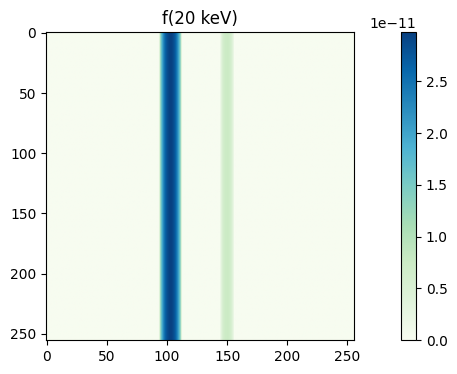

In [20]:
import numpy as np
from pathlib import Path
from typing import List, Tuple
import matplotlib.pyplot as plt

#Constantes
h = 1.054571817e-34 #joules*s
c = 2.99792458e8 #m/s
Q = 1.602e-19 #Para pasar de keV a joules

#Para convertir keV a joules
def keV_joules(Energias:np.ndarray)->np.ndarray:
    return Energias * Q * 1e3

#Cremos el Stack de las imagenes
def load_txt_stack(paths: List[str]) -> np.ndarray:
    mats = []
    for p in paths:
        arr = np.loadtxt(p)
        mats.append(arr)
    return np.stack(mats, axis=0)

#Calculamos f(E)=k*ln(I0/I)
def f_E(ff_paths: List[str], raw_paths: List[str], energies_keV: List[float], epsilon: float = 1e-12) -> Tuple[np.ndarray, np.ndarray]:
    
    # Cargar imágenes
    FF   = load_txt_stack(ff_paths)
    #print(FF)# (nE, H, W)
    RAW  = load_txt_stack(raw_paths)  # (nE, H, W)
    
    #k(E) = ħ c / (2 E)
    E_J   = keV_joules(np.asarray(energies_keV, dtype=float))    # (nE,)
    k = (h * c) / (2.0 * E_J)                                   # (nE,)

    # ln(FF/RAW) por energía
    ln = np.log(FF / RAW)                             # (nE, H, W)

    # Multiplicar por k(E) respetando broadcasting: (nE,1,1)
    f_e = (k[:, None, None]) * ln                       # (nE, H, W)
    return f_e, k


#Valores 
#/
energias = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]  # Energías en keV
raw  = [f"C:/Users/Esteban Gomez/OneDrive - Universidad de los Andes/Archivos universidad/Tesis Esteban/Simulaciones Python/RAW/RAW{e:.0f}keV.txt" for e in energias]#Rutas raw
ff = [f"C:/Users/Esteban Gomez/OneDrive - Universidad de los Andes/Archivos universidad/Tesis Esteban/Simulaciones Python/FF/FF{e:.0f}keV.txt" for e in energias]#Rutas de ff
FE, K = f_E(ff, raw, energias)

#------Comprobación visual f(E)------
print(FE.shape)
f_E1 = FE[0, :, :]  
plt.figure(figsize=(12,4))
plt.imshow(f_E1, cmap='GnBu')
plt.title("f(20 keV)")
plt.axis('on')
plt.colorbar()
print("Archivo RAW stack:", raw[0])
print("Archivo FF stack:", ff[0])
#------------------------------------

import os

print(os.path.realpath(raw[0]))
print(os.path.realpath(raw[1]))




# Creación de las matrices


In [21]:
# Empezamos definiendo los betas para cada material a cada energía
Beta_PMMA = np.array([8.4447E-10, 3.3454E-10, 1.8115E-10, 1.1789E-10, 8.6288E-11, 6.8306E-11, 5.6772E-11, 4.8513E-11, 4.2404E-11, 3.7577E-11])
Beta_HA = np.array([3.0579E-08, 1.0015E-08, 4.2474E-09, 2.141E-09, 1.2194E-09, 7.6015E-10, 5.088E-10, 3.623E-10, 2.7129E-10, 2.1123E-10])
Beta_Al = np.array([1.33E-08, 4.3768E-09 ,1.90248E-09 ,1.01135E-09 ,6.17363E-10 ,4.16727E-10 ,3.03435E-10 ,2.33582E-10 ,1.88145E-10 ,1.55956E-10])
#Como arriba quitamos la contribución del PMMA, los betas del HA y de la sangre quedan relativos al beta del PMMA
Beta_HA_rel = Beta_HA - Beta_PMMA 
Beta_Al_rel = Beta_Al - Beta_PMMA

Matriz_betas = np.column_stack((Beta_HA_rel, Beta_Al_rel))  # Matriz de betas relativa (9x2)
print("Matriz de betas relativa (10x2):")
print(Matriz_betas)

#--------------------------------------------------------------------------------------------------------------------------

#vamos a armar la matriz f(E), en esta matriz cada fila es un pixel y cada columna una energía
#f_E es mi stack de la forma 9,256,256
num_capas = FE.shape[0]  # Número de energías (capas)
total_pixeles = FE.shape[1] * FE.shape[2]  # Total de píxeles por capa
print(num_capas)
print(total_pixeles)
#Ahora voy a aplanar cada capa de 256x256 a un vector de 65536x1 y luego apilar esos vectores para formar una matriz de 9x65536|
fE_final = FE.reshape(num_capas, total_pixeles)  # Matriz final de f(E) de forma (9, 65536)
print(fE_final)

print(f"Por ejemplo el primer valor (n12) de cada matriz es:{FE[:,0,1]}")
print(f"Y la segunda columna es {fE_final[:,1].reshape(-1,1)}")

#--------------------------------------------------------------------------------------------------------------------------


Matriz de betas relativa (10x2):
[[2.973453e-08 1.245553e-08]
 [9.680460e-09 4.042260e-09]
 [4.066250e-09 1.721330e-09]
 [2.023110e-09 8.934600e-10]
 [1.133112e-09 5.310750e-10]
 [6.918440e-10 3.484210e-10]
 [4.520280e-10 2.466630e-10]
 [3.137870e-10 1.850690e-10]
 [2.288860e-10 1.457410e-10]
 [1.736530e-10 1.183790e-10]]
10
65536
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Por ejemplo el primer valor (n12) de cada matriz es:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y la segunda columna es [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# Solución por minimos cuadrados 

In [22]:
#Vamos a resolver el sistema f = AZ por minimos cuadrados
# Z = (A^T A)^(-1) A^T f
#----------------------------------------------------------------
#Paso 1 : Calcular A^T A
A_T = Matriz_betas.T  # Transpuesta de A (2x10)
#print(A_T)
A_T_A = A_T @ Matriz_betas  # Producto A^T A (2x2)
#print(A_T_A)
#----------------------------------------------------------------
#Regresión de ridge
#I = np.identity(A_T_A.shape[0])
#A_T_A_Ridge = A_T_A + 0 * I
#Paso 2: Calcular la inversa de A^T A
A_T_A_inv = np.linalg.inv(A_T_A)  # Inversa de A^T A (2x2)
#print(A_T_A_inv)
#----------------------------------------------------------------
#Paso 3: Calcular A_T_A_inv @ A^T
A_pseudo_inv = A_T_A_inv @ A_T  # Pseudoinversa de A (2x10)
#print(A_pseudo_inv)
#----------------------------------------------------------------
#Paso 4: Calcular Z = A_pseudo_inv @ f para cada píxel
Z = A_pseudo_inv @ fE_final  # Matriz Z de forma (2, 65536)
#print(Z)  # Cada fila corresponde a un material, cada columna a un píxel
print("\n--- Resultado Final ---")
print(f"Dimensión de Z (Grosores), cada fila corresponde a un material y cada columna a un pixel: {Z.shape}")
#----------------------------------------------------------------
#Paso 5: Vamos a reshappear Z para tener las imagenes de cada material
# La matriz Z tiene: Fila 0 = Grosor HA, Fila 1 = Grosor Sangre
Z_HA_plano = Z[0, :] 
Z_Al_plano = Z[1, :]
# np.reshape(256, 256) transforma el vector 1x65536 de vuelta a la imagen.
Z_HA_imagen = Z_HA_plano.reshape(256, 256)
Z_Al_imagen = Z_Al_plano.reshape(256, 256)
print(f"Dimensión de la imagen de Grosor HA/Placa: {Z_HA_imagen.shape}")
print(Z_HA_imagen[128,128])



--- Resultado Final ---
Dimensión de Z (Grosores), cada fila corresponde a un material y cada columna a un pixel: (2, 65536)
Dimensión de la imagen de Grosor HA/Placa: (256, 256)
0.0


# Graficas 

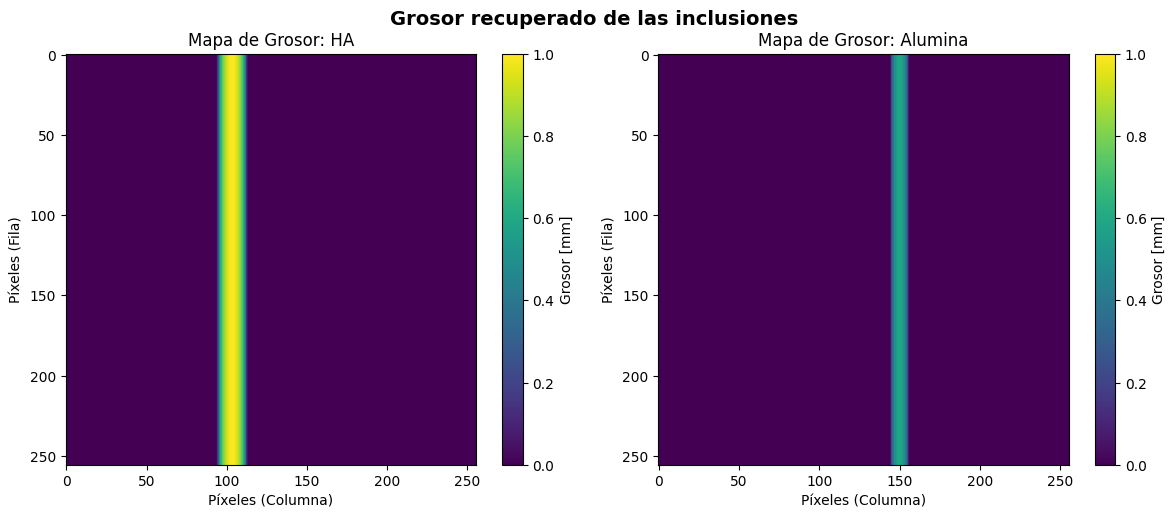

In [47]:
# 1. Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
fig.suptitle('Grosor recuperado de las inclusiones', fontsize=14, fontweight='bold')
# ----------------------------------------------------------------------
# 2. GRAFICAR MAPA DE GROSOR HA/PLACA (Material 1)
# ----------------------------------------------------------------------
im1 = axes[0].imshow(
    Z_HA_imagen*1e3, 
    cmap='viridis',  # Mapa de color: bueno para datos científicos
    origin='upper',
    vmax = 1# La convención usual para imágenes de datos es que (0,0) esté arriba
)
axes[0].set_title('Mapa de Grosor: HA')
axes[0].set_xlabel('Píxeles (Columna)')
axes[0].set_ylabel('Píxeles (Fila)')

# Barra de color para el grosor del Material 1
plt.colorbar(im1, ax=axes[0], label='Grosor [mm]')


# ----------------------------------------------------------------------
# 3. GRAFICAR MAPA DE GROSOR SANGRE (Material 2)
# ----------------------------------------------------------------------
im2 = axes[1].imshow(
    Z_Al_imagen*1e3, 
    cmap='viridis',  # Usamos un cmap diferente para distinguirlo visualmente
    origin='upper',
    vmax = 1
)
axes[1].set_title('Mapa de Grosor: Alumina')
axes[1].set_xlabel('Píxeles (Columna)')
axes[1].set_ylabel('Píxeles (Fila)')

# Barra de color para el grosor del Material 2
plt.colorbar(im2, ax=axes[1], label='Grosor [mm]')

# 4. Mostrar el gráfico
plt.tight_layout() # Ajusta automáticamente los subplots para que no se superpongan
plt.show()




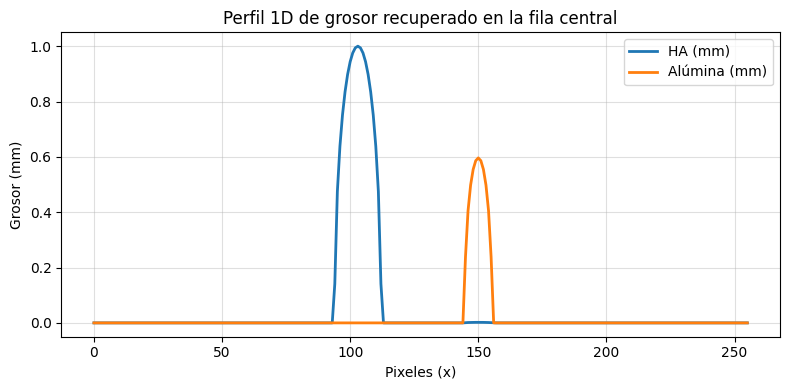

In [24]:
# Fila central de la imagen (puedes cambiarla)
fila_central = Z_HA_imagen.shape[0] // 2  

# Extraer la línea central (perfil) para cada material
perfil_HA = Z_HA_imagen[fila_central, :]
perfil_Al = Z_Al_imagen[fila_central, :]

# Crear eje en píxeles (x)
pixeles = np.arange(Z_HA_imagen.shape[1])

# --- Gráfica ---
plt.figure(figsize=(8, 4))
plt.plot(pixeles, perfil_HA * 1e3, label='HA (mm)', lw=2)   # convierte de m → mm
plt.plot(pixeles, perfil_Al * 1e3, label='Alúmina (mm)', lw=2)
plt.xlabel('Pixeles (x)')
plt.ylabel('Grosor (mm)')
plt.title('Perfil 1D de grosor recuperado en la fila central')
plt.grid(True, alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()



# Comparación entre grosor teorico y recuperado 

Chequeo igualdad t_total vs t_big (máx |dif|): 8.881784197001252e-16


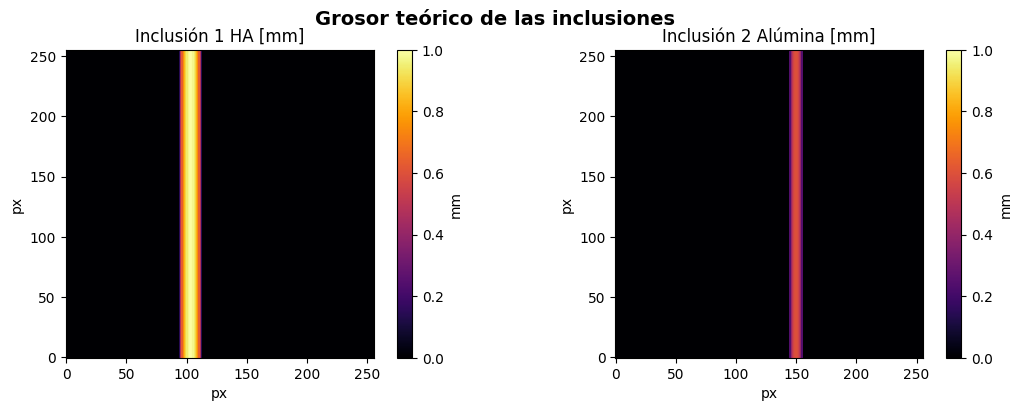

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Parámetros del detector ----------------
N = 256               # 256x256 píxeles
pix_mm = 0.055        # 55 µm en mm
xc = yc = N // 2      # centro en píxeles

# ---------------- Geometría de cilindros (en mm) ----------------
R_big_mm = 3       # radio cilindro grande
# dos cilindros internos (centros en píxeles sobre x; radios en mm)
inclusions = [
    {"xc_px": xc - 25, "R_mm": 0.50},   # inclusión 1
    {"xc_px": xc + 22, "R_mm": 0.30},   # inclusión 2
]

# ---------------- Eje x en mm (centrado) ----------------
x_px = np.arange(N)
x_mm = (x_px - xc) * pix_mm

def thickness_semicircle(x_mm, xc_px, R_mm, pix_mm):
    """Espesor 1D: 2*sqrt(R^2 - (x-xc)^2) dentro del cilindro; 0 fuera. (mm)"""
    dx_mm = (x_px - xc_px) * pix_mm
    t = np.zeros_like(dx_mm, dtype=float)
    mask = np.abs(dx_mm) <= R_mm
    t[mask] = 2.0 * np.sqrt(R_mm**2 - dx_mm[mask]**2)
    return t

# ---------------- Perfiles 1D de espesor ----------------
t_big = thickness_semicircle(x_mm, xc, R_big_mm, pix_mm)

# inclusiones
t_in_list = [thickness_semicircle(x_mm, inc["xc_px"], inc["R_mm"], pix_mm) for inc in inclusions]
t_in_sum = np.sum(t_in_list, axis=0)

# Espesor de la matriz (PMMA grande) tras restar inclusiones (recortar a >=0)
t_matrix = np.clip(t_big - t_in_sum, 0.0, None)

# Espesor total (de verificación): debe ser igual a t_big
t_total = t_matrix + t_in_sum

print("Chequeo igualdad t_total vs t_big (máx |dif|):", np.max(np.abs(t_total - t_big)))

# ---------------- Mapas 2D por apilado ----------------
t_big_img    = np.tile(t_big,    (N, 1))
t_matrix_img = np.tile(t_matrix, (N, 1))
t_in_imgs    = [np.tile(ti, (N, 1)) for ti in t_in_list]
t_total_img  = np.tile(t_total,  (N, 1))



# ---------------- Visualización ----------------
vmax = 2*R_big_mm  # escala 0–2R_big (mm)
cmap = "inferno"

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt



fig = plt.figure(figsize=(13, 4))
fig.suptitle('Grosor teórico de las inclusiones', fontsize=14, fontweight='bold')
# ------------------- Inclusión 1 -------------------
ax1 = plt.subplot(1, 2, 1)
im1 = ax1.imshow(t_in_imgs[0], origin='lower', cmap='inferno',
                 interpolation='nearest', vmin=0, vmax=1, aspect='equal')
ax1.set_title('Inclusión 1 HA [mm]')
ax1.set_xlabel('px'); ax1.set_ylabel('px')
plt.colorbar(im1, ax=ax1, label='mm')

# ------------------- Inclusión 2 -------------------
ax2 = plt.subplot(1, 2, 2)
im2 = ax2.imshow(t_in_imgs[1], origin='lower', cmap='inferno',
                 interpolation='nearest', vmin=0, vmax=1, aspect='equal')
ax2.set_title('Inclusión 2 Alúmina [mm]')
ax2.set_xlabel('px'); ax2.set_ylabel('px')
plt.colorbar(im2, ax=ax2, label='mm')




0.000644992444172054
0.00033169383961418155


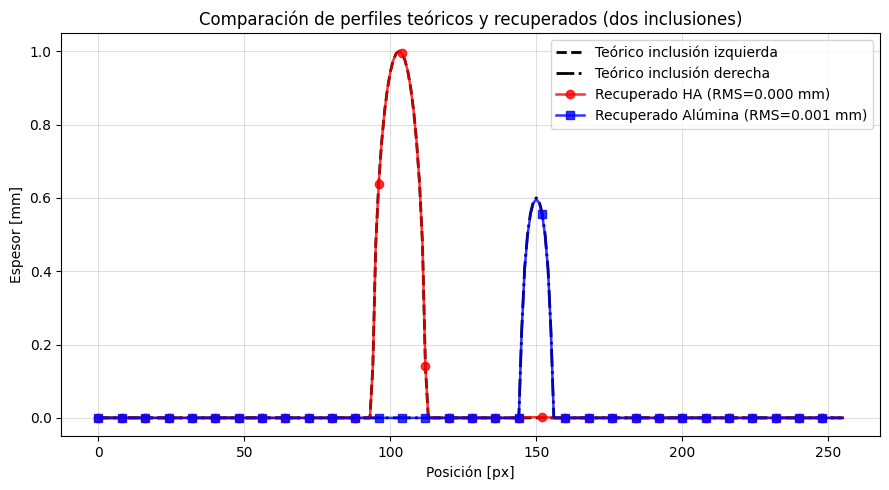

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# --------- Parámetros básicos ----------
y_centro = t_in_imgs[0].shape[0] // 2
pixeles = np.arange(t_in_imgs[0].shape[1])

# --------- Perfiles teóricos ----------
perfil_teo_izq = t_in_imgs[0][y_centro, :]
perfil_teo_der = t_in_imgs[1][y_centro, :]

# --------- Perfiles recuperados ----------
fila_central = Z_HA_imagen.shape[0] // 2
perfil_HA = Z_HA_imagen[fila_central, :] * 1e3
perfil_Al = Z_Al_imagen[fila_central, :] * 1e3

# --- Calcular errores RMS ---
rms_izq = np.sqrt(np.mean((perfil_teo_izq - perfil_HA)**2))
rms_der = np.sqrt(np.mean((perfil_teo_der - perfil_Al)**2))

print (rms_der)
print(rms_izq)

# --------- Gráfica comparativa ----------
plt.figure(figsize=(9,5))

# Perfiles teóricos
plt.plot(pixeles, perfil_teo_izq, 'k--', lw=2, label='Teórico inclusión izquierda', zorder=2)
plt.plot(pixeles, perfil_teo_der, 'k-.',  lw=2, label='Teórico inclusión derecha',   zorder=2)

# Perfiles recuperados (con transparencia y marcadores)
plt.plot(pixeles, perfil_HA, 'r-', lw=1.8, alpha=0.8, marker='o', markevery=8,
         label=f'Recuperado HA (RMS={rms_izq:.3f} mm)', zorder=3)
plt.plot(pixeles, perfil_Al, 'b-', lw=1.8, alpha=0.8, marker='s', markevery=8,
         label=f'Recuperado Alúmina (RMS={rms_der:.3f} mm)',   zorder=3)

plt.xlabel('Posición [px]')
plt.ylabel('Espesor [mm]')
plt.title('Comparación de perfiles teóricos y recuperados (dos inclusiones)')
plt.grid(True, alpha=0.4)
plt.legend(ncol=1)
plt.tight_layout()
plt.show()



# Grafica de W(E)

In [ ]:
import numpy as np

energy = [20, 25, 30, 35, 40, 45, 50, 55, 60]  # Energías en keV
W = np.array([1.3168569E-01, 1.81681E-01, 1.82387E-01, 1.59353E-01,
              1.28514E-01, 9.77094E-02, 6.74391E-02, 3.90076E-02, 1.22230E-02])

plt.figure(figsize=(7,4))
plt.plot(energy, W, marker='o', linewidth=1.8)
plt.xlabel("Energía (keV)")
plt.ylabel("Peso normalizado w(E)")
plt.title("Distribución espectral normalizada $W^{Al}_{62}$")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


n0 = 1e9  # Número total de fotones
n0w = n0 * W #nuevos eventos para las simulaciones por energía
print(n0w)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# DATOS
# ===============================
keV = np.array([15, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                31, 32, 33, 34, 35, 37, 39, 41, 43, 45, 47, 49])

w = np.array([0.0177, 0.0317, 0.0442, 0.0524, 0.0551, 0.0572, 0.0574, 0.0582,
              0.0573, 0.0568, 0.0561, 0.0531, 0.0498, 0.0502, 0.0474, 0.0453,
              0.0424, 0.0401, 0.0343, 0.0286, 0.0240, 0.0184, 0.0129, 0.00725,
              0.00209])

# ===============================
# GRÁFICO
# ===============================
plt.figure(figsize=(8, 5))
plt.plot(keV, w, marker='o', linestyle='-', color='royalblue')

# Etiquetas y estilo
plt.title("Distribución espectral normalizada $W^{Al}_{50}$", fontsize=14)
plt.xlabel("Energía (keV)", fontsize=12)
plt.ylabel("Peso normalizado $w(E)$", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(14, 50)
plt.ylim(0, 0.07)
plt.tight_layout()

# Mostrar
plt.show()

print(n0w)

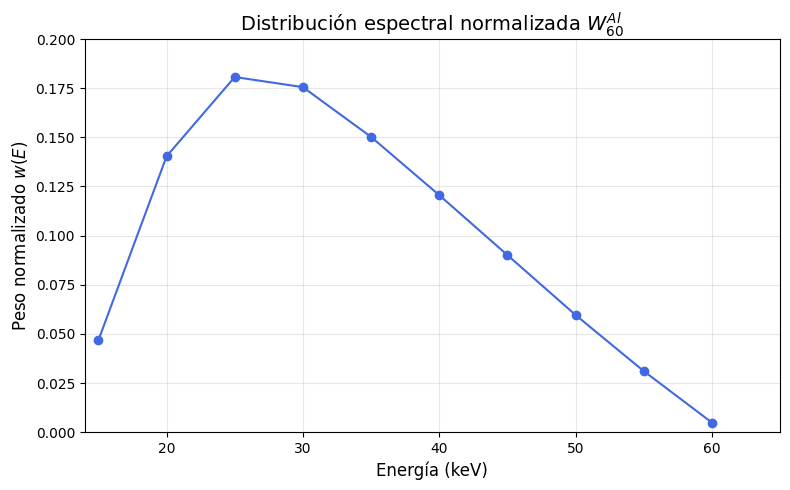

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# DATOS
# ===============================
keV = np.array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

w = np.array([0.046781116,0.140343348,0.180686695,0.175536481,0.150214592,0.120600858,0.090128755,0.059656652,0.03111588,0.004935622])

# ===============================
# GRÁFICO
# ===============================
plt.figure(figsize=(8, 5))
plt.plot(keV, w, marker='o', linestyle='-', color='royalblue')

# Etiquetas y estilo
plt.title("Distribución espectral normalizada $W^{Al}_{60}$", fontsize=14)
plt.xlabel("Energía (keV)", fontsize=12)
plt.ylabel("Peso normalizado $w(E)$", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(14, 65)
plt.ylim(0, 0.2)
plt.tight_layout()

# Mostrar
plt.show()

#print(n0w)